##Uploading and formatting

Uploading the datasets

In [1]:
from google.colab import files
uploaded = files.upload()

Saving telemetry_1.csv to telemetry_1.csv
Saving telemetry_2.csv to telemetry_2.csv
Saving vehicle_data.csv to vehicle_data.csv


Making the excel sheets to dataframes

In [5]:
import pandas as pd

telemetry1 = pd.read_csv('telemetry_1.csv')
telemetry2 = pd.read_csv('telemetry_2.csv')
vehicle_data = pd.read_csv('vehicle_data.csv')

##Data Pre-processing

Data Inspection

In [74]:
print('TELEMETRY 1')
print(telemetry1.head())
print()

print('TELEMETRY 2')
print(telemetry2.head())
print()

print('VEHICLE DATA')
print(vehicle_data.head(20))

TELEMETRY 1
   vehicle_id                 timestamp  speed  odometer  fuel_level
0   vehicle_4 2024-06-06 14:26:23-07:00   64.2       NaN         NaN
1   vehicle_8                       NaT    1.6   12048.0         NaN
2   vehicle_3                       NaT    NaN       NaN        45.0
3  vehicle_10                       NaT   36.2    1434.7         NaN
4  vehicle_11 2024-07-06 11:08:03-07:00   29.5       NaN         NaN

TELEMETRY 2
   vehicle_id                 timestamp   val   name
0   vehicle_4 2024-07-23 19:56:44+05:30   0.0  speed
1  vehicle_11 2024-04-04 22:33:56+05:30  52.7  speed
2   vehicle_3                       NaT   5.8  speed
3   vehicle_3                       NaT  34.4  speed
4  vehicle_10                       NaT  42.8  speed

VEHICLE DATA
            id datasource  tank_capacity  rated_mpg
0    vehicle_1   source_1           18.0         35
1    vehicle_2   source_1           15.8         32
2    vehicle_3   source_2           15.8         24
3    vehicle_4   sour

Getting the timestamps in the same format in both the telemetry tables

In [67]:
telemetry1['timestamp'] = pd.to_datetime(telemetry1['timestamp'], errors='coerce')
telemetry2['timestamp'] = pd.to_datetime(telemetry2['timestamp'], errors='coerce')

In [68]:
print('Dataframe Shape')
print('Telemetry 1 shape: ', telemetry1.shape)
print('Telemetry 2 shape: ', telemetry2.shape)
print('Vehicle Data shape: ', vehicle_data.shape)
print()

print('Summary Statistics')
print(telemetry1.describe())
print()
print(telemetry2.describe())
print()
print(vehicle_data.describe())
print()


print('Missing Values')
print(telemetry1.isnull().sum())
print()
print(telemetry2.isnull().sum())
print()
print(vehicle_data.isnull().sum())

Dataframe Shape
Telemetry 1 shape:  (408670, 5)
Telemetry 2 shape:  (425893, 4)
Vehicle Data shape:  (11, 4)

Summary Statistics
               speed       odometer    fuel_level
count  271080.000000  272566.000000  96559.000000
mean       31.655172    7354.928006     69.169699
std        30.639936    7759.389663     26.552232
min         0.000000       0.000000      1.000000
25%         0.000000    1988.400000     48.000000
50%        24.900000    4582.000000     73.000000
75%        62.800000    9818.150000     96.000000
max       116.100000   39059.000000    110.000000

                 val
count  425893.000000
mean     3168.455671
std      6239.633323
min         0.000000
25%        33.100000
50%        82.000000
75%      3793.500000
max     39061.000000

       tank_capacity  rated_mpg
count      11.000000  11.000000
mean       18.909091  29.363636
std         3.752987  10.528749
min        13.000000  21.000000
25%        16.850000  21.500000
50%        18.000000  24.000000
75%   

Visualizing the summary/missing values

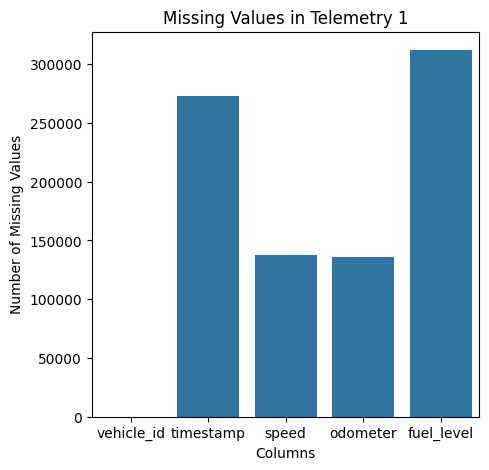

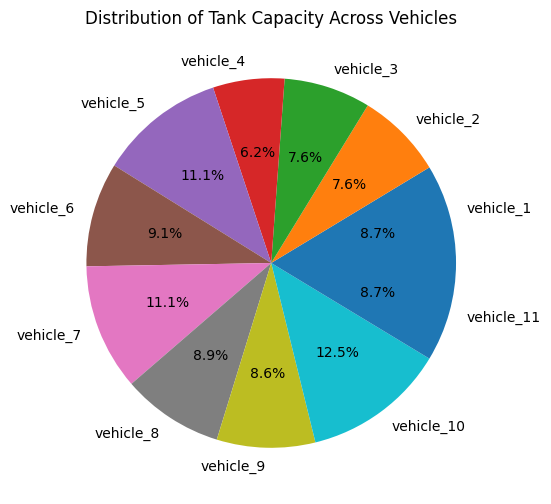

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Chart for Missing Values in Telemetry 1
missing_values = telemetry1.isnull().sum()
plt.figure(figsize=(5, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values in Telemetry 1')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

# 2. Pie Chart for Tank Capacity in Vehicle Data
plt.figure(figsize=(6, 6))
plt.pie(vehicle_data['tank_capacity'], labels=vehicle_data['id'], autopct='%1.1f%%')
plt.title('Distribution of Tank Capacity Across Vehicles')
plt.show()

From the above charts we can infer the following data:

1. There are 11 distinct vehicle IDs so we can infer that there are a total of 11 vehicles that we have the data for.
2.   About missing data

*   In the table 'Telemetry 1', missing values are present in the columns for 'speed', 'odometer', 'fuel-levels' and 'timestamps'
*   The dataframe 'vehicle_data' has no missing values.





Since there are multiple speed readings for each vehicle at different timestamps, I am aggregating the data to get a meaningful representation

Steps:
1. Groupping by Vehicle ID: aggregating the speed data and fuel tank levels for each vehicle.
2. Calculating Averages for every vehicle.
3. Plotting the Averages (histogram)

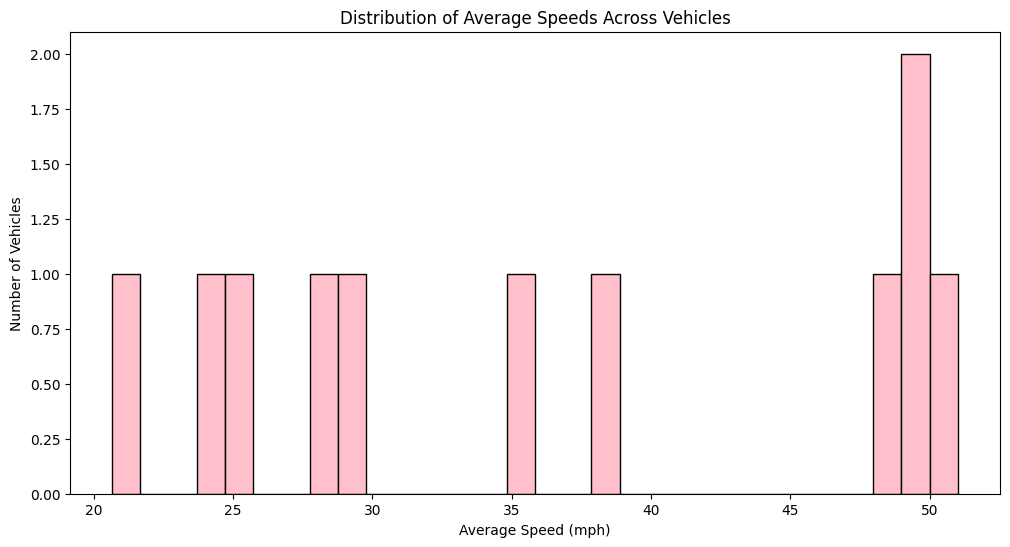

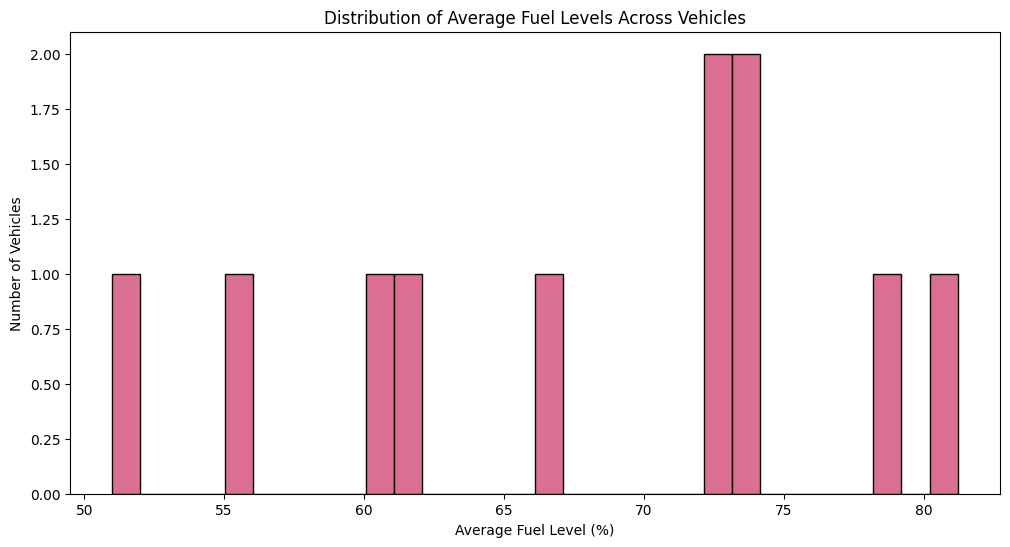

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

avg_speeds = telemetry1.groupby('vehicle_id')['speed'].mean()
avg_fuel_levels = telemetry1.groupby('vehicle_id')['fuel_level'].mean()

# Plot the average speeds
plt.figure(figsize=(12, 6))
plt.hist(avg_speeds.dropna(), bins=30, edgecolor='black', color='pink')
plt.title('Distribution of Average Speeds Across Vehicles')
plt.xlabel('Average Speed (mph)')
plt.ylabel('Number of Vehicles')
plt.show()

# Plot the average fuel levels
plt.figure(figsize=(12, 6))
plt.hist(avg_fuel_levels.dropna(), bins=30, edgecolor='black', color='palevioletred')
plt.title('Distribution of Average Fuel Levels Across Vehicles')
plt.xlabel('Average Fuel Level (%)')
plt.ylabel('Number of Vehicles')
plt.show()

In [71]:
# Group by vehicle_id and calculate the maximum odometer reading for each vehicle
max_odometer_readings = telemetry1.groupby('vehicle_id')['odometer'].max()

# Print or display the maximum odometer readings
print("Maximum Odometer Readings for Each Vehicle:")
print(max_odometer_readings)

Maximum Odometer Readings for Each Vehicle:
vehicle_id
vehicle_1     29959.0
vehicle_10     1995.8
vehicle_11    39059.0
vehicle_2     22943.0
vehicle_3      7360.8
vehicle_4      8228.0
vehicle_5      4388.7
vehicle_6      5402.2
vehicle_7      8012.0
vehicle_8     13348.7
vehicle_9      6282.0
Name: odometer, dtype: float64


In [72]:
# Group by vehicle_id and calculate the range of odometer readings (max - min) for each vehicle
odometer_range = telemetry1.groupby('vehicle_id')['odometer'].agg(lambda x: x.max() - x.min())

# Print or display the odometer range
print("Range of Odometer Readings for Each Vehicle:")
print(odometer_range)

Range of Odometer Readings for Each Vehicle:
vehicle_id
vehicle_1     29493.0
vehicle_10     1706.9
vehicle_11    24066.0
vehicle_2     11811.0
vehicle_3      7316.1
vehicle_4      8225.0
vehicle_5      4388.7
vehicle_6      5402.2
vehicle_7      4464.6
vehicle_8     13348.7
vehicle_9      6279.0
Name: odometer, dtype: float64


In [73]:
# Pivot Telemetry 2 data to match the structure of Telemetry 1
telemetry2_pivoted = telemetry2.pivot_table(index=['vehicle_id', 'timestamp'], columns='name', values='val').reset_index()

# Display the pivoted data to ensure correctness
print(telemetry2_pivoted.head())

name vehicle_id                 timestamp  fuel_level  odometer  speed
0     vehicle_1 2024-01-02 20:50:03+05:30         NaN     466.0    NaN
1     vehicle_1 2024-01-02 20:50:22+05:30         NaN       NaN    0.0
2     vehicle_1 2024-01-02 20:51:22+05:30         NaN       NaN    0.0
3     vehicle_1 2024-01-02 20:52:06+05:30       100.0     466.0    NaN
4     vehicle_1 2024-01-02 20:54:09+05:30         NaN     466.0    NaN


## Combining Dataset

In [50]:
# Merge Telemetry 1 and Telemetry 2 (pivoted)
telemetry_combined = pd.merge(telemetry1, telemetry2_pivoted, on=['vehicle_id', 'timestamp'], how='outer')

# Display the combined data to verify
print(telemetry_combined.head())

  vehicle_id                 timestamp  speed_x  odometer_x  fuel_level_x  \
0  vehicle_4 2024-06-06 14:26:23-07:00     64.2         NaN           NaN   
1  vehicle_8                       NaT      1.6     12048.0           NaN   
2  vehicle_8                       NaT     73.1     10167.3           NaN   
3  vehicle_8                       NaT     76.9     10200.9           NaN   
4  vehicle_8                       NaT     62.0     11154.9           NaN   

   fuel_level_y  odometer_y  speed_y  
0           NaN         NaN      NaN  
1           NaN         NaN      NaN  
2           NaN         NaN      NaN  
3           NaN         NaN      NaN  
4           NaN         NaN      NaN  


In [51]:
# Combining conflicting columns
telemetry_combined['speed'] = telemetry_combined['speed_x'].combine_first(telemetry_combined['speed_y'])
telemetry_combined['odometer'] = telemetry_combined['odometer_x'].combine_first(telemetry_combined['odometer_y'])
telemetry_combined['fuel_level'] = telemetry_combined['fuel_level_x'].combine_first(telemetry_combined['fuel_level_y'])

# Drop the original columns with suffixes
telemetry_combined = telemetry_combined.drop(columns=['speed_x', 'speed_y', 'odometer_x', 'odometer_y', 'fuel_level_x', 'fuel_level_y'])

# Display the combined data to verify
print(telemetry_combined.head())

  vehicle_id                 timestamp  speed  odometer  fuel_level
0  vehicle_4 2024-06-06 14:26:23-07:00   64.2       NaN         NaN
1  vehicle_8                       NaT    1.6   12048.0         NaN
2  vehicle_8                       NaT   73.1   10167.3         NaN
3  vehicle_8                       NaT   76.9   10200.9         NaN
4  vehicle_8                       NaT   62.0   11154.9         NaN


## Understanding missing values

In [52]:
# missing values in the combined table
missing_values = telemetry_combined.isnull().sum()
print("Missing Values in Combined Telemetry Table:")
print(missing_values)
print()

# summary statistics for combined table
summary_statistics = telemetry_combined.describe()
print("Summary Statistics of Combined Telemetry Table:")
print(summary_statistics)


Missing Values in Combined Telemetry Table:
vehicle_id         0
timestamp     273245
speed         205455
odometer      203043
fuel_level    379129
dtype: int64

Summary Statistics of Combined Telemetry Table:
               speed       odometer     fuel_level
count  310485.000000  312897.000000  136811.000000
mean       33.794361    8564.083997      70.001433
std        31.140771    8774.733658      26.407193
min         0.000000       0.000000       1.000000
25%         0.000000    2197.200000      49.000000
50%        29.800000    5159.900000      74.000000
75%        65.800000   12029.500000      97.000000
max       116.100000   39061.000000     110.000000


The fuel level column has significant missing values, this can cause a drop in the accuracy of results concerning fuel economy

Understanding missing values by vehicle ID

In [53]:
missing_values_by_vehicle = telemetry_combined.groupby('vehicle_id').apply(lambda x: x.isnull().sum())

print("Missing Values by Vehicle ID:")
print(missing_values_by_vehicle)

Missing Values by Vehicle ID:
            vehicle_id  timestamp  speed  odometer  fuel_level
vehicle_id                                                    
vehicle_1            0      12340  62801     62184       62218
vehicle_10           0      22204   4121      4496       18116
vehicle_11           0      12011  54107     53542       53617
vehicle_2            0          0  26435     26069       26085
vehicle_3            0      73932  10592     10592       63396
vehicle_4            0          0  16418     15446       15656
vehicle_5            0      36462   5225      5202       31303
vehicle_6            0      34839   4854      4828       30022
vehicle_7            0      38474   5532      5532       32993
vehicle_8            0      42983   6251      6216       36784
vehicle_9            0          0   9119      8936        8939


## Handling missing values

For handling missing values in the fuel level column, I am using forward fill method

In [63]:
# Sorting data by vehicle_id and timestamp
telemetry_combined = telemetry_combined.sort_values(by=['vehicle_id', 'timestamp'])

# Forward filling missing values in the 'fuel_level' column
telemetry_combined['fuel_level'] = telemetry_combined.groupby('vehicle_id')['fuel_level'].ffill()

print(telemetry_combined['fuel_level'].isnull().sum())     # checking for remaining missing values

print(telemetry_combined.head(150))
print()
print(telemetry_combined.tail(150))

90
       vehicle_id                 timestamp  speed  odometer  fuel_level
408670  vehicle_1 2024-01-02 08:20:03-07:00    NaN     466.0         NaN
408671  vehicle_1 2024-01-02 08:20:22-07:00    0.0       NaN         NaN
408672  vehicle_1 2024-01-02 08:21:22-07:00    0.0       NaN         NaN
408673  vehicle_1 2024-01-02 08:22:06-07:00    NaN     466.0       100.0
408674  vehicle_1 2024-01-02 08:24:09-07:00    NaN     466.0       100.0
...           ...                       ...    ...       ...         ...
408815  vehicle_1 2024-01-20 08:12:30-07:00    NaN     569.0        77.0
408816  vehicle_1 2024-01-20 08:13:30-07:00    NaN     570.0        77.0
408817  vehicle_1 2024-01-20 08:13:36-07:00    NaN       NaN        76.0
408818  vehicle_1 2024-01-20 08:13:38-07:00   75.6       NaN        76.0
408819  vehicle_1 2024-01-20 08:15:34-07:00    NaN     573.0        76.0

[150 rows x 5 columns]

       vehicle_id                 timestamp  speed  odometer  fuel_level
352008  vehicle_9 2024-

For handling missing values in speed and odometer columns, I am using interpolation as that would give a smooth transitioning

In [65]:
telemetry_combined['speed'].interpolate(method='linear', inplace=True)
telemetry_combined['odometer'].interpolate(method='linear', inplace=True)

print(telemetry_combined.head(150))
print()
print(telemetry_combined.tail(150))

       vehicle_id                 timestamp      speed  odometer  fuel_level
408670  vehicle_1 2024-01-02 08:20:03-07:00        NaN     466.0         NaN
408671  vehicle_1 2024-01-02 08:20:22-07:00   0.000000     466.0         NaN
408672  vehicle_1 2024-01-02 08:21:22-07:00   0.000000     466.0         NaN
408673  vehicle_1 2024-01-02 08:22:06-07:00   0.000000     466.0       100.0
408674  vehicle_1 2024-01-02 08:24:09-07:00   0.000000     466.0       100.0
...           ...                       ...        ...       ...         ...
408815  vehicle_1 2024-01-20 08:12:30-07:00  75.500000     569.0        77.0
408816  vehicle_1 2024-01-20 08:13:30-07:00  75.533333     570.0        77.0
408817  vehicle_1 2024-01-20 08:13:36-07:00  75.566667     571.0        76.0
408818  vehicle_1 2024-01-20 08:13:38-07:00  75.600000     572.0        76.0
408819  vehicle_1 2024-01-20 08:15:34-07:00  75.450000     573.0        76.0

[150 rows x 5 columns]

       vehicle_id                 timestamp  speed 

## Calculating fuel economy

Distance traveled (in miles) for each vehicle.

In [79]:
telemetry_combined['distance_traveled'] = telemetry_combined.groupby('vehicle_id')['odometer'].diff().ffill()

In [80]:
print(telemetry_combined.head(200))

       vehicle_id                 timestamp      speed    odometer  \
408670  vehicle_1 2024-01-02 08:20:03-07:00        NaN  466.000000   
408671  vehicle_1 2024-01-02 08:20:22-07:00   0.000000  466.000000   
408672  vehicle_1 2024-01-02 08:21:22-07:00   0.000000  466.000000   
408673  vehicle_1 2024-01-02 08:22:06-07:00   0.000000  466.000000   
408674  vehicle_1 2024-01-02 08:24:09-07:00   0.000000  466.000000   
...           ...                       ...        ...         ...   
408865  vehicle_1 2024-01-20 09:00:22-07:00  71.666667  627.000000   
408866  vehicle_1 2024-01-20 09:01:23-07:00  72.050000  628.000000   
408867  vehicle_1 2024-01-20 09:01:27-07:00  72.433333  629.000000   
408868  vehicle_1 2024-01-20 09:02:19-07:00  72.816667  630.000000   
408869  vehicle_1 2024-01-20 09:02:38-07:00  73.200000  631.666667   

        fuel_level  distance_traveled  
408670         NaN                NaN  
408671         NaN           0.000000  
408672         NaN           0.000000  

In [ ]:
# Drop duplicate columns and simplify the DataFrame
if 'vehicle_id_x' in telemetry_combined.columns and 'vehicle_id_y' in telemetry_combined.columns:
    telemetry_combined = telemetry_combined.drop(columns=['vehicle_id_y'])

# Set 'vehicle_id' as the index
telemetry_combined.set_index('vehicle_id', inplace=True)

# Function to calculate fuel economy
def calculate_fuel_economy(df):
    results = []

    # Iterate through each vehicle
    for vehicle_id, group in df.groupby(level=0):
        # Sort by timestamp
        group = group.sort_index(level=1)

        # Initialize previous values
        prev_odometer = prev_fuel_level = None

        for index, row in group.iterrows():
            # Only consider rows where odometer and fuel_level are available
            if pd.notnull(row['odometer']) and pd.notnull(row['fuel_level']):
                if prev_odometer is not None and prev_fuel_level is not None:
                    # Calculate distance and fuel used
                    distance = row['odometer'] - prev_odometer
                    fuel_used = prev_fuel_level - row['fuel_level']
                    if fuel_used > 0:
                        fuel_economy = distance / fuel_used
                        results.append({'vehicle_id': vehicle_id, 'fuel_economy': fuel_economy})

                # Update previous values
                prev_odometer = row['odometer']
                prev_fuel_level = row['fuel_level']

    return pd.DataFrame(results)

# Calculate fuel economy
fuel_economy_df = calculate_fuel_economy(telemetry_combined)


In [91]:
print(fuel_economy_df.head(100))

   vehicle_id  fuel_economy
0   vehicle_1      3.541667
1   vehicle_1      0.333333
2   vehicle_1      4.666667
3   vehicle_1      2.600000
4   vehicle_1      3.333333
..        ...           ...
95  vehicle_1      4.333333
96  vehicle_1      4.333333
97  vehicle_1      3.619048
98  vehicle_1      4.238095
99  vehicle_1      3.666667

[100 rows x 2 columns]


In [90]:
average_fuel_economy = fuel_economy_df.groupby('vehicle_id')['fuel_economy'].mean().reset_index()

# Display the results
print(average_fuel_economy)

    vehicle_id  fuel_economy
0    vehicle_1      0.804978
1   vehicle_10     -1.999050
2   vehicle_11      2.599252
3    vehicle_2      2.010622
4    vehicle_3     -2.021289
5    vehicle_4      3.047143
6    vehicle_5      6.885935
7    vehicle_6      1.537318
8    vehicle_7      1.035998
9    vehicle_8      1.811511
10   vehicle_9      1.266133


In [92]:
# Ensure timestamps are in datetime format
telemetry_combined['timestamp'] = pd.to_datetime(telemetry_combined['timestamp'])

# Group by vehicle_id
def calculate_fuel_economy(df):
    results = []

    # Group data by vehicle_id
    grouped = df.groupby(level=0)

    for vehicle_id, group in grouped:
        # Sort by timestamp
        group = group.sort_index(level=1)

        # Initialize previous values
        prev_odometer = None
        prev_fuel_level = None

        total_distance = 0
        total_fuel_consumed = 0

        for index, row in group.iterrows():
            if pd.notnull(row['odometer']) and pd.notnull(row['fuel_level']):
                if prev_odometer is not None and prev_fuel_level is not None:
                    # Calculate distance and fuel used
                    distance = abs(row['odometer'] - prev_odometer)
                    fuel_used = abs(prev_fuel_level - row['fuel_level'])

                    if fuel_used > 0:
                        total_distance += distance
                        total_fuel_consumed += fuel_used

                # Update previous values
                prev_odometer = row['odometer']
                prev_fuel_level = row['fuel_level']

        # Calculate fuel economy
        if total_fuel_consumed > 0:
            fuel_economy = total_distance / total_fuel_consumed
        else:
            fuel_economy = None

        results.append({'vehicle_id': vehicle_id, 'fuel_economy': fuel_economy})

    return pd.DataFrame(results)

# Calculate fuel economy
fuel_economy_df = calculate_fuel_economy(telemetry_combined)

print(fuel_economy_df)

    vehicle_id  fuel_economy
0    vehicle_1     24.904845
1   vehicle_10     12.454454
2   vehicle_11     30.408802
3    vehicle_2      4.738117
4    vehicle_3     70.022159
5    vehicle_4      3.879308
6    vehicle_5     44.724516
7    vehicle_6     43.020135
8    vehicle_7     38.793841
9    vehicle_8     44.121769
10   vehicle_9      4.050161


##Comparing Results

In [94]:
print(fuel_economy_df)

    vehicle_id  fuel_economy
0    vehicle_1     24.904845
1   vehicle_10     12.454454
2   vehicle_11     30.408802
3    vehicle_2      4.738117
4    vehicle_3     70.022159
5    vehicle_4      3.879308
6    vehicle_5     44.724516
7    vehicle_6     43.020135
8    vehicle_7     38.793841
9    vehicle_8     44.121769
10   vehicle_9      4.050161


In [93]:
print('VEHICLE DATA')
print(vehicle_data.head(20))

VEHICLE DATA
            id datasource  tank_capacity  rated_mpg
0    vehicle_1   source_1           18.0         35
1    vehicle_2   source_1           15.8         32
2    vehicle_3   source_2           15.8         24
3    vehicle_4   source_1           13.0         32
4    vehicle_5   source_2           23.0         22
5    vehicle_6   source_2           19.0         56
6    vehicle_7   source_2           23.0         21
7    vehicle_8   source_2           18.5         21
8    vehicle_9   source_1           17.9         24
9   vehicle_10   source_2           26.0         21
10  vehicle_11   source_1           18.0         35


<Figure size 1200x600 with 0 Axes>

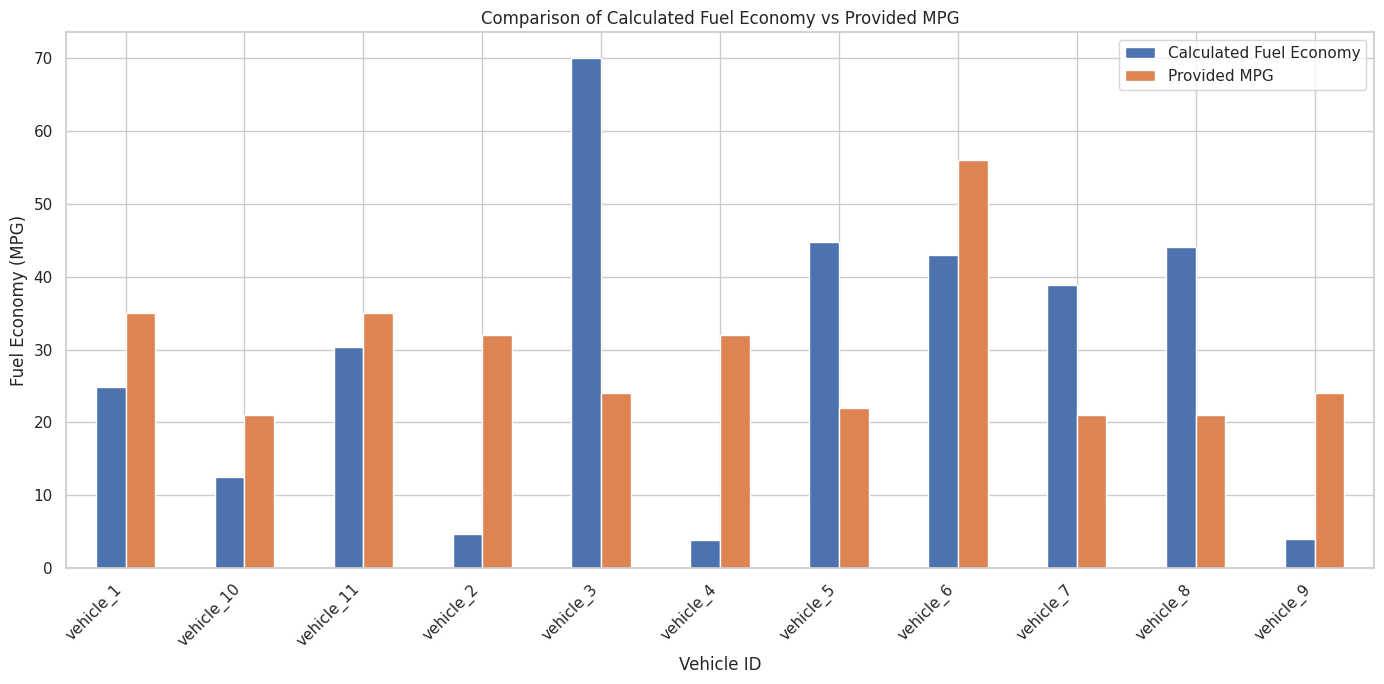

In [98]:
# Rename the column in vehicle_data to match the column name in fuel_economy_df
vehicle_data.rename(columns={'id': 'vehicle_id'}, inplace=True)

# Merging the DataFrames on 'vehicle_id'
comparison_df = pd.merge(fuel_economy_df, vehicle_data[['vehicle_id', 'rated_mpg']], on='vehicle_id')

# Rename columns for clarity
comparison_df.rename(columns={'fuel_economy': 'Calculated Fuel Economy', 'rated_mpg': 'Provided MPG'}, inplace=True)

# Plotting the comparison
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

comparison_df.set_index('vehicle_id').plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Calculated Fuel Economy vs Provided MPG')
plt.ylabel('Fuel Economy (MPG)')
plt.xlabel('Vehicle ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
